In [1]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [34]:
def pad_image(image: torch.Tensor, padding: int) -> torch.Tensor:
    """
    Adds reflection padding to the image.

    :param image: Input image
    :param padding: Padding size
    :return: Padded image
    """
    c, h, w = image.shape
    padded_image = torch.zeros((c, h + 2 * padding, w + 2 * padding), dtype=image.dtype)
    padded_image[:, padding:padding + h, padding:padding + w] = image
    padded_image[:, :padding, padding:padding + w] = torch.flip(image[:, :padding, :], [1])
    padded_image[:, padding + h:, padding:padding + w] = torch.flip(image[:, -padding:, :], [1])
    padded_image[:, padding:padding + h, :padding] = torch.flip(image[:, :, :padding], [2])
    padded_image[:, padding:padding + h, padding + w:] = torch.flip(image[:, :, -padding:], [2])
    padded_image[:, :padding, :padding] = torch.flip(image[:, :padding, :padding], [1, 2])
    padded_image[:, :padding, padding + w:] = torch.flip(image[:, :padding, -padding:], [1, 2])
    padded_image[:, padding + h:, :padding] = torch.flip(image[:, -padding:, :padding], [1, 2])
    padded_image[:, padding + h:, padding + w:] = torch.flip(image[:, -padding:, -padding:], [1, 2])
    
    return padded_image

def median_filter(image: torch.Tensor, kernel_size: int) -> torch.Tensor:
    """
    Applies a median filter to the image.

    :param image: Input image as a tensor
    :param kernel_size: Kernel size for the median filter
    :return: Filtered image
    """
    assert kernel_size % 2 == 1
    padding = kernel_size // 2
    image_padded = pad_image(image, padding)
    filtered_image = torch.zeros_like(image)
    
    for c in range(image.shape[0]):
        for i in range(image.shape[1]):
            for j in range(image.shape[2]):
                window = image_padded[c, i:i+kernel_size, j:j+kernel_size].reshape(-1)
                median_value = window.median()
                filtered_image[c, i, j] = median_value
    
    return filtered_image

def load_image(image_path: str) -> torch.Tensor:
    """
    Loads an image and converts it to a tensor.

    :param image_path: Path to the image
    :return: Image as a tensor
    """
    image = Image.open(image_path)
    image_np = np.array(image).astype(np.float32) / 255.0
    image_tensor = torch.from_numpy(image_np).permute(2, 0, 1)
    return image_tensor

def show_image(image_tensor: torch.Tensor, title: str = "Image"):
    """
    Displays the image from a tensor.

    :param image_tensor: Image tensor
    :param title: Window title
    """
    image_np = image_tensor.permute(1, 2, 0).numpy()
    plt.imshow(image_np)
    plt.title(title)
    plt.axis('off')
    plt.show()

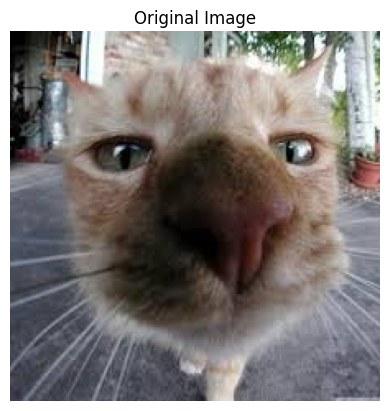

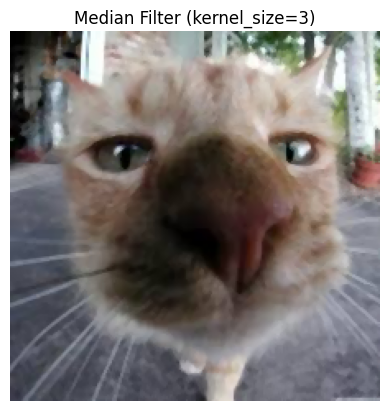

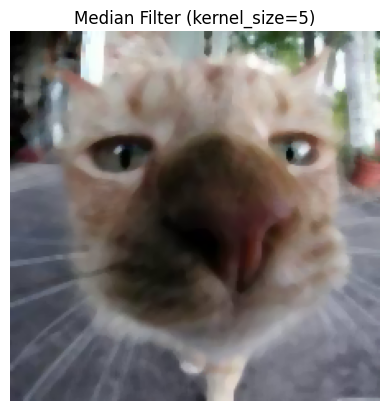

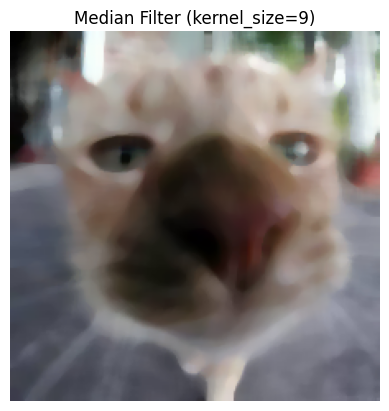

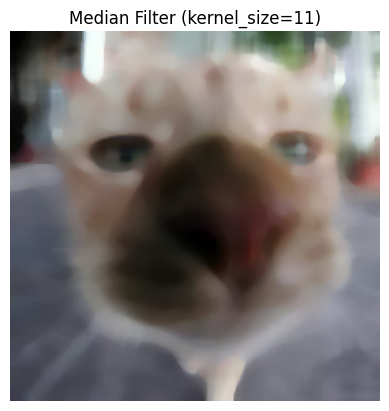

In [35]:
image_path = "images.jpg"  # Замените на путь к изображению
image_tensor = load_image(image_path)

# Применим медианный фильтр с разными размерами ядра
kernel_sizes = [3, 5, 9, 11]

# Отображаем исходное изображение
show_image(image_tensor, title="Original Image")

for kernel_size in kernel_sizes:
    filtered_image = median_filter(image_tensor, kernel_size)
    show_image(filtered_image, title=f"Median Filter (kernel_size={kernel_size})")